In [15]:
import math
import random
from typing import Self

import igraph as ig
import numpy as np

In [16]:
class Gene:
    def __init__(self, chromosome: list | np.ndarray = None) -> None:
        self.chromosome = list(chromosome)
        self.cost = None
        self.each_client_visited_once = None
            
    def __repr__(self) -> str:
        return str(self.chromosome)

    def crossover(self, gene: Self) -> Self:
        break_point = random.randrange(1, len(self.chromosome))
        new_chromosome = self.chromosome[:break_point]
        
        for el in gene.chromosome[break_point:] + gene.chromosome[:break_point]:
            if el not in new_chromosome:
                new_chromosome.append(el)
                
        return Gene(new_chromosome)

    def mutate(self, mutation_chance: float) -> Self:
        if random.random() >= mutation_chance:
            return self
        
        position1 = random.randrange(len(self.chromosome))
        position2 = random.randrange(len(self.chromosome) - 1)
        if position2 >= position1:
            position2 += 1
        
        new_chromosome = self.chromosome.copy()
        new_chromosome[position1], new_chromosome[position2] = (
            new_chromosome[position2],
            new_chromosome[position1],
        )
        return Gene(new_chromosome)
    
    def get_paths(self) -> list[list[int]]:
        self.each_client_visited_once = True
        
        paths = [[0] for _ in range(num_couriers)]
        loads = courier_max_load.copy()
        chromosome_el = 0
        client = self.chromosome[chromosome_el]
        demand = demands[client]
        
        for courier in range(num_couriers):
            while loads[courier] >= demand:
                loads[courier] -= demand
                paths[courier].append(client)

                chromosome_el += 1
                if chromosome_el == len(self.chromosome):
                    for path in paths:
                        path.append(0)
                    return paths
                client = self.chromosome[chromosome_el]
                demand = demands[client]
                
            if loads[courier] != 0:
                self.each_client_visited_once = False
                
                paths[courier].append(client)
                demand -= loads[courier]
                loads[courier] = 0
                
    def get_cost(self):
        if self.cost is None:
            paths = self.get_paths()
            if paths is None:
                return math.inf
            
            cost = 0
            for courier in range(num_couriers):
                for el in range(len(paths[courier]) - 1):
                    client_from = paths[courier][el]
                    client_to = paths[courier][el + 1]
                    
                    cost += distance_matrix[client_from][client_to] * 100 * salary_per_km[courier]
            
            self.cost = cost / 100
        return self.cost

In [17]:
class Population:
    def __init__(self, genes: list[Gene]):
        self.genes = genes
        
    def get_sorted_genes(self, population_only: bool = False):
        if population_only:
            return sorted(self.genes[:POPULATION_SIZE], key=lambda x: x.get_cost())
        return sorted(self.genes, key=lambda x: x.get_cost())
        
    def spawn_children(self, mutation_chance: int):
        for child_i in range(CHILDREN_NUMBER // 2):
            parent_1 = self.genes[random.randrange(POPULATION_SIZE)]
            parent_2 = self.genes[random.randrange(POPULATION_SIZE)]
        
            self.genes.append(
                parent_1.crossover(parent_2).mutate(mutation_chance)
            )
            self.genes.append(
                parent_2.crossover(parent_1).mutate(mutation_chance)
            )
    
    def get_best_gene(self, each_client_visited_once: bool = False):
        if each_client_visited_once:
            return min(
                self.genes,
                key=lambda x: x.get_cost() + math.inf * int(not x.each_client_visited_once)
            )
        return min(self.genes, key=lambda x: x.get_cost())

In [18]:
distance_matrix = [
    [0, 5.48, 7.76, 6.96, 5.82, 2.74, 5.02, 1.94, 3.08, 1.94, 5.36, 5.02, 3.88, 3.54, 4.68, 7.76, 6.62],
    [5.48, 0, 6.84, 3.08, 1.94, 5.02, 7.30, 3.54, 6.96, 7.42, 10.84, 5.94, 4.80, 6.74, 10.16, 8.68, 12.10],
    [7.76, 6.84, 0, 9.92, 8.78, 5.02, 2.74, 8.10, 4.68, 7.42, 4.00, 12.78, 11.64, 11.30, 7.88, 15.52, 7.54],
    [6.96, 3.08, 9.92, 0, 1.14, 6.50, 8.78, 5.02, 8.44, 8.90, 12.32, 5.14, 6.28, 8.22, 11.64, 5.60, 13.58],
    [5.82, 1.94, 8.78, 1.14, 0, 5.36, 7.64, 3.88, 7.30, 7.76, 11.18, 4.00, 5.14, 7.08, 10.50, 6.74, 12.44],
    [2.74, 5.02, 5.02, 6.50, 5.36, 0, 2.28, 3.08, 1.94, 2.40, 5.82, 7.76, 6.62, 6.28, 5.14, 10.50, 7.08],
    [5.02, 7.30, 2.74, 8.78, 7.64, 2.28, 0, 5.36, 1.94, 4.68, 3.54, 10.04, 8.90, 8.56, 5.14, 12.78, 4.80],
    [1.94, 3.54, 8.10, 5.02, 3.88, 3.08, 5.36, 0, 3.42, 3.88, 7.30, 4.68, 3.54, 3.20, 6.62, 7.42, 8.56],
    [3.08, 6.96, 4.68, 8.44, 7.30, 1.94, 1.94, 3.42, 0, 2.74, 3.88, 8.10, 6.96, 6.62, 3.20, 10.84, 5.14],
    [1.94, 7.42, 7.42, 8.90, 7.76, 2.40, 4.68, 3.88, 2.74, 0, 3.42, 5.36, 4.22, 3.88, 2.74, 8.10, 4.68],
    [5.36, 10.84, 4.00, 12.32, 11.18, 5.82, 3.54, 7.30, 3.88, 3.42, 0, 8.78, 7.64, 7.30, 3.88, 11.52, 3.54],
    [5.02, 5.94, 12.78, 5.14, 4.00, 7.76, 10.04, 4.68, 8.10, 5.36, 8.78, 0, 1.14, 3.08, 6.50, 2.74, 8.44],
    [3.88, 4.80, 11.64, 6.28, 5.14, 6.62, 8.90, 3.54, 6.96, 4.22, 7.64, 1.14, 0, 1.94, 5.36, 3.88, 7.30],
    [3.54, 6.74, 11.30, 8.22, 7.08, 6.28, 8.56, 3.20, 6.62, 3.88, 7.30, 3.08, 1.94, 0, 3.42, 4.22, 5.36],
    [4.68, 10.16, 7.88, 11.64, 10.50, 5.14, 5.14, 6.62, 3.20, 2.74, 3.88, 6.50, 5.36, 3.42, 0, 7.64, 1.94],
    [7.76, 8.68, 15.52, 5.60, 6.74, 10.50, 12.78, 7.42, 10.84, 8.10, 11.52, 2.74, 3.88, 4.22, 7.64, 0, 7.98],
    [6.62, 12.10, 7.54, 13.58, 12.44, 7.08, 4.80, 8.56, 5.14, 4.68, 3.54, 8.44, 7.30, 5.36, 1.94, 7.98, 0]
]

demands = [0, 100, 100, 200, 400, 200, 400, 800, 800, 100, 200, 100, 200, 400, 400, 800, 800]
num_couriers = 4
salary_per_km = [100, 80, 80, 60]
courier_max_load = [2500, 1500, 1500, 500]

In [19]:
POPULATION_SIZE = 2000
CHILDREN_NUMBER = 500
ITERATIONS_NUMBER = 1000

In [20]:
population = Population(
    [
        Gene(np.random.permutation(range(1, 17)))
        for _ in range(POPULATION_SIZE)
    ]
)

In [21]:
for iteration in range(ITERATIONS_NUMBER):
    print(
        iteration + 1,
        population.get_best_gene(each_client_visited_once=True).get_cost()
    )
    
    population.spawn_children(mutation_chance=0.5)
    next_population_genes = population.get_sorted_genes()[:POPULATION_SIZE]
    population = Population(next_population_genes)

1 11572.0
2 7807.2
3 7807.2
4 7695.2
5 7695.2
6 7695.2
7 7695.2
8 7695.2
9 7695.2
10 7695.2
11 7243.2
12 7243.2
13 7243.2
14 7243.2
15 7243.2
16 7243.2
17 7243.2
18 7243.2
19 7243.2
20 7152.8
21 7152.8
22 7152.8
23 7012.0
24 7012.0
25 7012.0
26 6944.0
27 6273.6
28 6273.6
29 6273.6
30 6273.6
31 6273.6
32 6273.6
33 6273.6
34 6273.6
35 6273.6
36 6273.6
37 6273.6
38 6273.6
39 6273.6
40 6273.6
41 6273.6
42 6273.6
43 6273.6
44 6273.6
45 6273.6
46 6273.6
47 6273.6
48 6273.6
49 5948.8
50 5948.8
51 5948.8
52 5948.8
53 5948.8
54 5948.8
55 5948.8
56 5948.8
57 5948.8
58 5948.8
59 5948.8
60 5948.8
61 5948.8
62 5948.8
63 5948.8
64 5948.8
65 5948.8
66 5948.8
67 5948.8
68 5948.8
69 5948.8
70 5948.8
71 5948.8
72 5948.8
73 5948.8
74 5948.8
75 5948.8
76 5948.8
77 5875.2
78 5875.2
79 5875.2
80 5875.2
81 5875.2
82 5875.2
83 5510.4
84 5510.4
85 5510.4
86 5510.4
87 5510.4
88 5510.4
89 5510.4
90 5510.4
91 5510.4
92 5510.4
93 5510.4
94 5510.4
95 5510.4
96 5510.4
97 5510.4
98 5510.4
99 5510.4
100 5510.4
101 551

In [22]:
print(f"Minimal delivery cost: {population.get_best_gene().get_cost()}")

Minimal delivery cost: 5154.4


PATHS:
COURIER 1: [0, 9, 14, 16, 6, 8, 0] - RED
COURIER 2: [0, 7, 1, 4, 3, 0] - GREEN
COURIER 3: [0, 12, 11, 15, 13, 0] - BLUE
COURIER 4: [0, 10, 2, 5, 0] - YELLOW


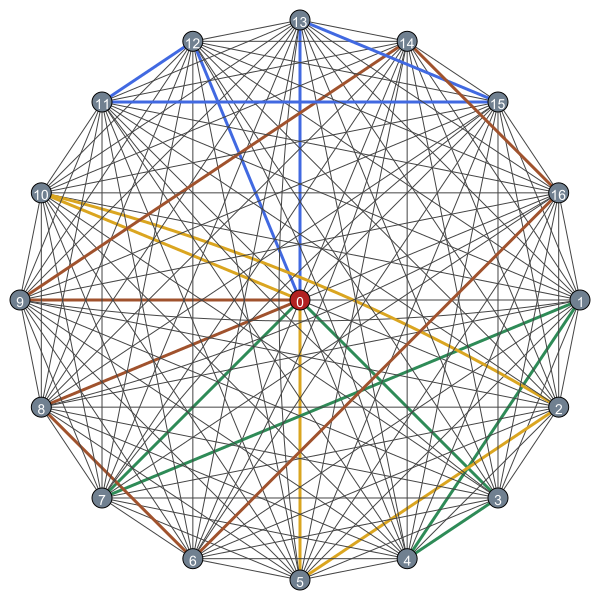

In [23]:
best_gene_paths = population.get_best_gene().get_paths()

g = ig.Graph.Weighted_Adjacency(distance_matrix, mode="undirected")
layout = g.layout_star()

print("PATHS:")
for i, (color_code, color_name) in enumerate(
    [
        ("sienna", "RED"),
        ("seagreen", "GREEN"),
        ("royalblue", "BLUE"),
        ("goldenrod", "YELLOW"),
    ]
):
    print(f"COURIER {i + 1}: {best_gene_paths[i]} - {color_name}")
    
    for j in range(len(best_gene_paths[i]) - 1):
        edge_from = best_gene_paths[i][j]
        edge_to = best_gene_paths[i][j + 1]
        
        edge = g.es.select(_between=((edge_from,), (edge_to,)))
        edge["color"] = color_code
        edge["width"] = 3
        
    for j in range(1, 9):        
        edge = g.es.select(_between=((j,), (j + 8,)))
        edge["curved"] = 0.1 * (1 if j % 2 == 0 else -1)

ig.plot(
    g,
    layout=layout,
    vertex_label=range(17),
    vertex_label_color="white",
    vertex_color=["firebrick"] + ["slategray" for _ in range(16)],
)